<h1><center style="color:green;">MODELO PREDICTIVO PARA LA DETECCIÓN DE FRAUDES EN TARJETAS DE CRÉDITO APLICANDO APRENDIZAJE AUTOMÁTICO</center></h1>

## Autores : Daniel Enrique Barros Agamez & Kevin Acosta Lopez


## 1. Cargando Datos

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import ttest_ind

# Sentencia para mostrar la traza de la gráfica
%matplotlib inline

# Estilo de los gráficos
plt.style.use('ggplot')

In [50]:
COLUMNAS = np.array(['Id','Fecha de Transaccion','No tarjeta cliente','Nombre comerciante','Categoria comerciante','Monto transaccion', 'Nombre',
           'Apellido','Genero','Direccion tarjeta','Ciudad','Estado','Zip tarjeta','Latitud','Longitud','Ciudad popular',
           'Trabajo','Fecha de nacimiento','Fecha unica','Hora transaccion','Latitud comerciante','Longitud comerciante', 'Fraude'])
data = pd.read_csv("fraude.csv", delimiter = ',' , names = COLUMNAS , header = 0)
del(COLUMNAS)
data.head(5)

,Id,Fecha de Transaccion,No tarjeta cliente,Nombre comerciante,Categoria comerciante,Monto transaccion,Nombre,Apellido,Genero,Direccion tarjeta,...,Latitud,Longitud,Ciudad popular,Trabajo,Fecha de nacimiento,Fecha unica,Hora transaccion,Latitud comerciante,Longitud comerciante,Fraude
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


## 2. Exploración de los datos

### *2.1 y 2.2 Número de instancias y atributos:*

In [51]:
shape = data.shape
print(f"Número de instancias: {shape[0]}")
print(f"Número de atributos: {shape[1]}")

Número de instancias: 563225
Número de atributos: 23


### *2.3 El conjunto de datos está etiquetado con la variable de clase "is_fraud"*

### *2.4 Cantidad de atributos numéricos y categóricos*

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563225 entries, 0 to 563224
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     563225 non-null  int64  
 1   Fecha de Transaccion   563225 non-null  object 
 2   No tarjeta cliente     563225 non-null  int64  
 3   Nombre comerciante     563225 non-null  object 
 4   Categoria comerciante  563225 non-null  object 
 5   Monto transaccion      563225 non-null  float64
 6   Nombre                 563225 non-null  object 
 7   Apellido               563225 non-null  object 
 8   Genero                 563225 non-null  object 
 9   Direccion tarjeta      563225 non-null  object 
 10  Ciudad                 563225 non-null  object 
 11  Estado                 563225 non-null  object 
 12  Zip tarjeta            563225 non-null  int64  
 13  Latitud                563225 non-null  float64
 14  Longitud               563225 non-nu

In [53]:
data['Fraude'] = data['Fraude'].astype('object')
categorico = data.select_dtypes(include = 'object').columns
numerico = data.select_dtypes(include = 'int64').columns
flotante = data.select_dtypes(include = 'float64').columns

print("------CANTIDAD DE ATRIBUTOS SEGÚN SU TIPO-------")
print(f"\nVariables categoricas: {len(categorico)} \n{categorico.values}")
print(f"\nVariables númericas: {len(numerico)} \n{numerico.values}")
print(f"\nVariables numericas flotantes: {len(flotante)} \n{flotante.values}")

------CANTIDAD DE ATRIBUTOS SEGÚN SU TIPO-------

Variables categoricas: 13 
['Fecha de Transaccion' 'Nombre comerciante' 'Categoria comerciante'
 'Nombre' 'Apellido' 'Genero' 'Direccion tarjeta' 'Ciudad' 'Estado'
 'Trabajo' 'Fecha de nacimiento' 'Fecha unica' 'Fraude']

Variables númericas: 5 
['Id' 'No tarjeta cliente' 'Zip tarjeta' 'Ciudad popular'
 'Hora transaccion']

Variables numericas flotantes: 5 
['Monto transaccion' 'Latitud' 'Longitud' 'Latitud comerciante'
 'Longitud comerciante']


### *2.5 Moda, cantidad de valores únicos y frecuencia de atributos categoricos*

In [54]:
data[categorico].describe()

,Fecha de Transaccion,Nombre comerciante,Categoria comerciante,Nombre,Apellido,Genero,Direccion tarjeta,Ciudad,Estado,Trabajo,Fecha de nacimiento,Fecha unica,Fraude
count,563225,563225,563225,563225,563225,563225,563225,563225,563225,563225,563225,563225,563225
unique,552261,693,14,355,486,2,999,906,51,497,984,563225,2
top,2020-12-17 20:36:39,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,6983 Carrillo Isle,Birmingham,TX,Film/video editor,1977-03-23,b505e1ca4f5f47a27aed4d30c3833005,0
freq,4,1906,56988,11606,12286,308621,1476,2434,40872,4163,2424,1,553574


In [55]:
print("MODA DE LAS VARIABLES CATEGORICAS")
for i, name in enumerate(categorico):
    print(f"{i+1}. {name} \nModa: {data[name].mode().values} \n")
    

MODA DE LAS VARIABLES CATEGORICAS
1. Fecha de Transaccion 
Moda: ['2020-10-05 19:37:49' '2020-12-13 17:53:47' '2020-12-17 20:36:39'
 '2020-12-19 16:02:22'] 

2. Nombre comerciante 
Moda: ['fraud_Kilback LLC'] 

3. Categoria comerciante 
Moda: ['gas_transport'] 

4. Nombre 
Moda: ['Christopher'] 

5. Apellido 
Moda: ['Smith'] 

6. Genero 
Moda: ['F'] 

7. Direccion tarjeta 
Moda: ['6983 Carrillo Isle'] 

8. Ciudad 
Moda: ['Birmingham'] 

9. Estado 
Moda: ['TX'] 

10. Trabajo 
Moda: ['Film/video editor'] 

11. Fecha de nacimiento 
Moda: ['1977-03-23'] 

12. Fecha unica 
Moda: ['00005fc67bb45d98730559d40c9ca601' '00006889944d759855fea412e09ecdd8'
 '00008f7ba50172eef2b057a0e06aa142' ... 'ffff99c31e9bb9ae314e0fd5910217e3'
 'ffffbc82aa8e0ef7e6acb579c52ad599' 'ffffc1df97a828ae4c69359c9f05daab'] 

13. Fraude 
Moda: [0] 



### *2.6 Media, rango y desviación estandar de cada atributo numérico*

In [80]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,Id,No tarjeta cliente,Monto transaccion,Zip tarjeta,Latitud,Longitud,Ciudad popular,Hora transaccion,Latitud comerciante,Longitud comerciante,Fraude
count,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00,563225.00
mean,282484.62,417605729174909888.00,75.55,48831.91,38.54,-90.23,88342.56,1380248545.45,38.54,-90.23,0.02
std,170645.17,1309403186960773632.00,170.53,26860.93,5.06,13.73,300756.40,6553585.37,5.10,13.74,0.13
min,0.00,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325466397.00,19.03,-166.67,0.00
25%,139497.00,180042946491150.00,9.73,26237.00,34.69,-96.80,741.00,1375827319.00,34.76,-96.90,0.00
50%,279515.00,3521417320836166.00,47.84,48174.00,39.37,-87.48,2408.00,1380581462.00,39.38,-87.44,0.00
75%,419686.00,4635330563105903.00,84.44,72011.00,41.89,-80.18,19685.00,1385842393.00,41.95,-80.26,0.00
max,1295733.00,4992346398065154048.00,22768.11,99921.00,66.69,-67.95,2906700.00,1388534374.00,67.51,-66.95,1.00


In [57]:
#rango
data.select_dtypes(exclude='object').apply(lambda x: max(x)-min(x))

Id                      1.295733e+06
No tarjeta cliente      4.992346e+18
Monto transaccion       2.276711e+04
Zip tarjeta             9.866400e+04
Latitud                 4.666620e+01
Longitud                9.772200e+01
Ciudad popular          2.906677e+06
Hora transaccion        6.306798e+07
Latitud comerciante     4.848284e+01
Longitud comerciante    9.971955e+01
dtype: float64

### *2.7 Distribción de las clases*

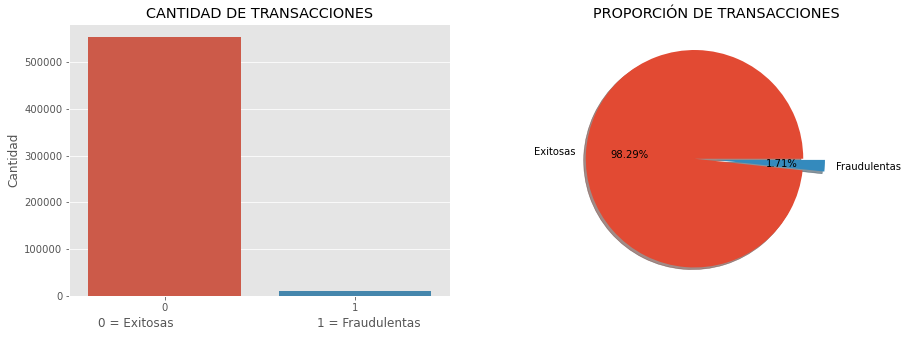

In [58]:
datos = data['Fraude'].value_counts()
labels = np.array(['Exitosas', 'Fraudulentas'])
#figura y gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
circular = ax2.pie(datos.values, labels=labels, autopct='%1.2f%%', shadow=True, explode = [0.2, 0])
#barras = ax1.bar(labels, datos.values)
barras = sb.countplot(x = 'Fraude', data = data, ax = ax1)
#Titulos
ax2.set(title="PROPORCIÓN DE TRANSACCIONES")
ax1.set(title="CANTIDAD DE TRANSACCIONES")
ax1.set(ylabel = 'Cantidad')
ax1.set(xlabel = f'0 = Exitosas {" "*35} 1 = Fraudulentas')
plt.show()

Distribución: Se puede observer cuán desequilibrado está el conjunto de datos, pues la mayoría de las transacciones no son fraudulentas. Si usamos este conjunto de datos como base para los modelos y análisis predictivos, se podrian obtener muchos errores y los algoritmos probablemente se sobreajustarán, ya que "asumirán" que la mayoría de las transacciones no son fraudes.

In [20]:
print("Cantidad de fruades : ", datos[1])
print("Cantidad casos exitosos : ", datos[0])
print("Difenrencia entre las clases: ", datos[0]-datos[1])

Cantidad de fruades :  9651
Cantidad casos exitosos :  553574
Difenrencia entre las clases:  543923


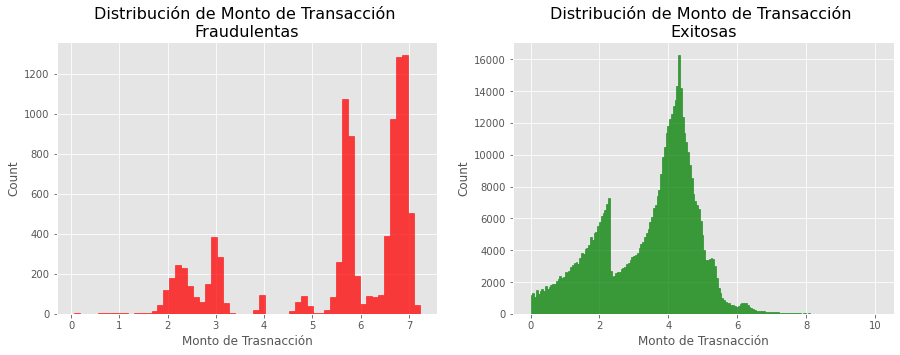

In [59]:
monto_Fra = data['Monto transaccion'].loc[data['Fraude'] == 1].values #Fraudulentas
monto_Exi = data['Monto transaccion'].loc[data['Fraude'] == 0].values #Exitosas
#Figuras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1 = sb.histplot(np.log(monto_Fra), ax = ax1, element = "step", color = 'red')
ax2 = sb.histplot(np.log(monto_Exi), ax = ax2, element="step", color = 'green')
#Etiquetas
ax1.set_xlabel('Monto de Trasnacción')
ax1.set_title('Distribución de Monto de Transacción \nFraudulentas', fontsize=16)
ax2.set_xlabel('Monto de Trasnacción')
ax2.set_title('Distribución de Monto de Transacción \nExitosas', fontsize=16)
plt.show()

Media Monto de Transacción :  75.54883345022084


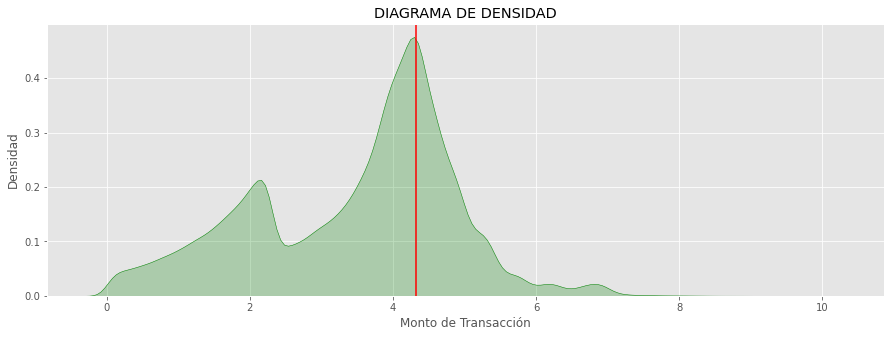

In [60]:
plt.figure(figsize=(15, 5))
media1 = data['Monto transaccion'].mean()
sb.kdeplot(x = np.log(data['Monto transaccion'].values), shade = True, color = 'green')
plt.ylabel("Densidad")
plt.xlabel("Monto de Transacción")
plt.title("DIAGRAMA DE DENSIDAD")
plt.axvline(np.log(media1), 0,1, color = 'red')
print(f"Media Monto de Transacción :  {media1}")

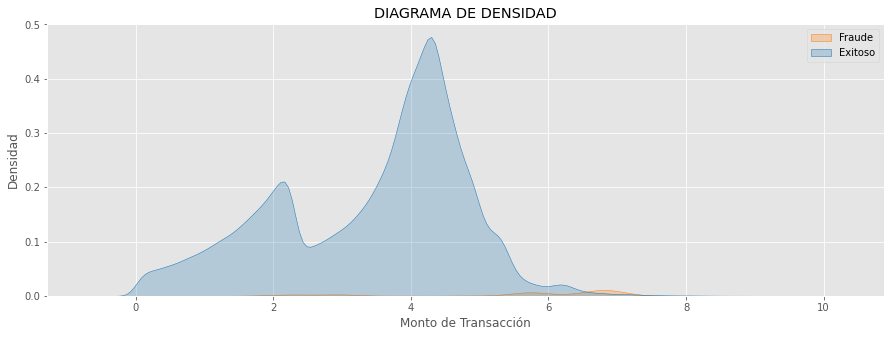

In [61]:
#Cambiar colores
plt.figure(figsize=(15, 5))
sb.kdeplot(x = np.log(data['Monto transaccion'].values), shade = True, hue = data['Fraude'], palette = "tab10", legend = False)
plt.ylabel("Densidad")
plt.xlabel("Monto de Transacción")
plt.legend(['Fraude', 'Exitoso'])
plt.title("DIAGRAMA DE DENSIDAD")
plt.show()

### *2.8 Detección de datos perdidos y atípicos*

In [30]:
#Detectando datos nulos
data.isna().sum()

Id                       0
Fecha de Transaccion     0
No tarjeta cliente       0
Nombre comerciante       0
Categoria comerciante    0
Monto transaccion        0
Nombre                   0
Apellido                 0
Genero                   0
Direccion tarjeta        0
Ciudad                   0
Estado                   0
Zip tarjeta              0
Latitud                  0
Longitud                 0
Ciudad popular           0
Trabajo                  0
Fecha de nacimiento      0
Fecha unica              0
Hora transaccion         0
Latitud comerciante      0
Longitud comerciante     0
Fraude                   0
dtype: int64

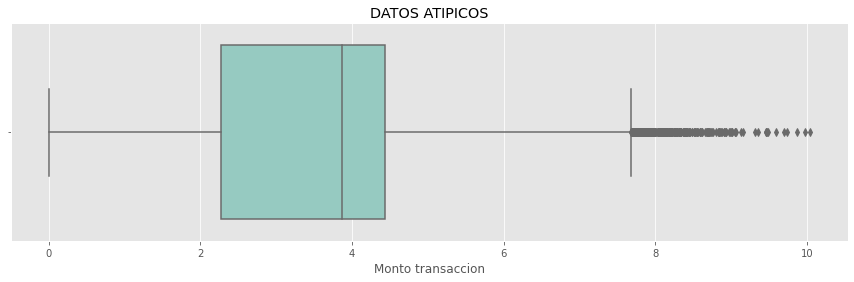

count    563225.000000
mean         75.548833
std         170.529091
min           1.000000
25%           9.730000
50%          47.840000
75%          84.440000
max       22768.110000
Name: Monto transaccion, dtype: float64
IQR:  74.71
Mediana:  47.84


In [62]:
plt.figure(figsize=(15, 4))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(x = np.log(data['Monto transaccion']), orient="h", palette="Set3")
plt.show()
print(data['Monto transaccion'].describe())
print("IQR: ", data['Monto transaccion'].quantile(0.75)-data['Monto transaccion'].quantile(0.25))
print("Mediana: ", data['Monto transaccion'].median())

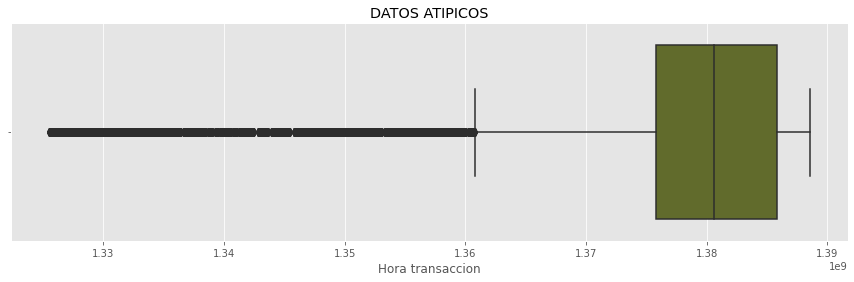

count    5.632250e+05
mean     1.380249e+09
std      6.553585e+06
min      1.325466e+09
25%      1.375827e+09
50%      1.380581e+09
75%      1.385842e+09
max      1.388534e+09
Name: Hora transaccion, dtype: float64
IQR:  10015074.0
Mediana:  1380581462.0


In [63]:
plt.figure(figsize=(15, 4))
plt.title("DATOS ATIPICOS")
ax = sb.boxplot(x = data['Hora transaccion'], orient="h", color = '#687522')
plt.show()
print(data['Hora transaccion'].describe())
print("IQR: ", data['Hora transaccion'].quantile(0.75)-data['Hora transaccion'].quantile(0.25))
print("Mediana: ", data['Hora transaccion'].median())

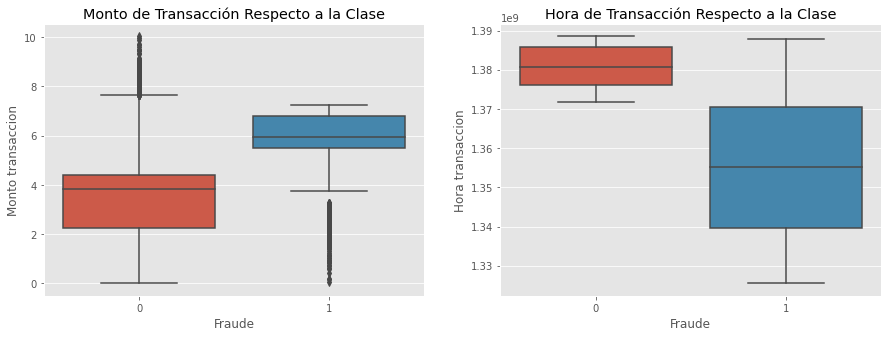

In [64]:
#Outliers monto de transacción respecto al atriuto clase
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1 = sb.boxplot(y = np.log(data["Monto transaccion"]), x = data['Fraude'], ax = ax1)
ax2 = sb.boxplot(y = data["Hora transaccion"], x = data['Fraude'], ax = ax2)
#Etiquetas
ax1.set_title('Monto de Transacción Respecto a la Clase')
ax2.set_title('Hora de Transacción Respecto a la Clase')
plt.show()

### 2.9. *Resolviendo algunas preguntas*

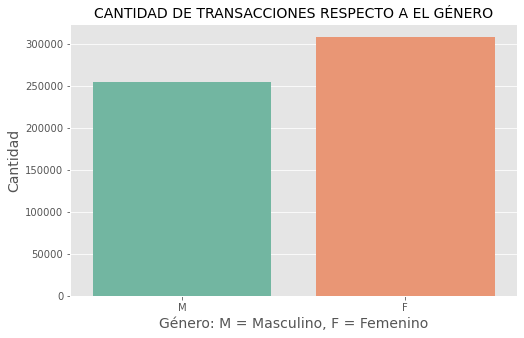

In [65]:
#Relación cantidad de transacciones y género
plt.figure(figsize=(8,5))
ax = sb.countplot(x = data['Genero'], data = data, palette="Set2")
ax.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax.set_ylabel("Cantidad", fontsize=14)
ax.set_title("CANTIDAD DE TRANSACCIONES RESPECTO A EL GÉNERO", fontsize = 14)
plt.show()

In [29]:
data.groupby('Genero')['Genero'].count().sort_values(ascending = False)

Genero
F    308621
M    254604
Name: Genero, dtype: int64

In [30]:
#Relación cantidad de transacciones exitosas y fraudulentas con respecto al género
genero_Fra = data[data.Fraude == 1] # fraudulentas
genero_Exi = data[data.Fraude == 0] # exitosas

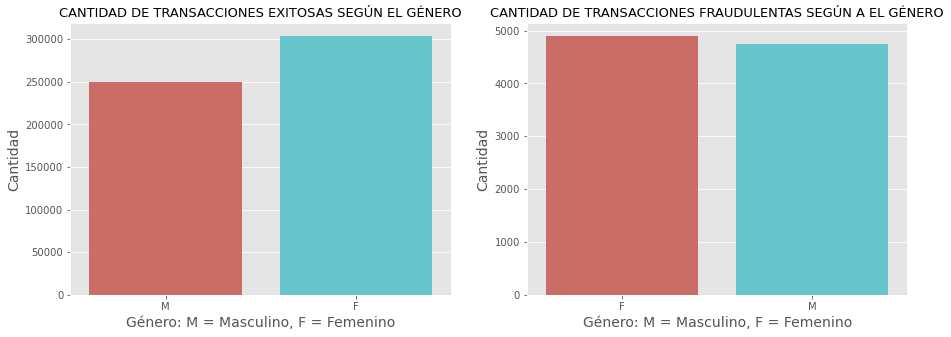

In [66]:
#Figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
#Gráfica
ax1 = sb.countplot(x = 'Genero', data = genero_Exi, ax = ax1, palette = 'hls')
ax2 = sb.countplot(x = 'Genero', data = genero_Fra, ax = ax2, palette = 'hls')
#Etiquetas
ax1.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax1.set_ylabel("Cantidad", fontsize=14)
ax1.set_title("CANTIDAD DE TRANSACCIONES EXITOSAS SEGÚN EL GÉNERO", fontsize=13)
ax2.set_xlabel("Género: M = Masculino, F = Femenino", fontsize=14)
ax2.set_ylabel("Cantidad", fontsize=14)
ax2.set_title("CANTIDAD DE TRANSACCIONES FRAUDULENTAS SEGÚN A EL GÉNERO", fontsize=13)
plt.show()

In [32]:
#data['Fecha de Transaccion'] = pd.to_datetime(data['Fecha de Transaccion'])
#ax = sb.lineplot(x='Fecha de Transaccion', data = data)
estados = data.groupby('Estado')['Estado'].count().sort_values(ascending = False).head(10)

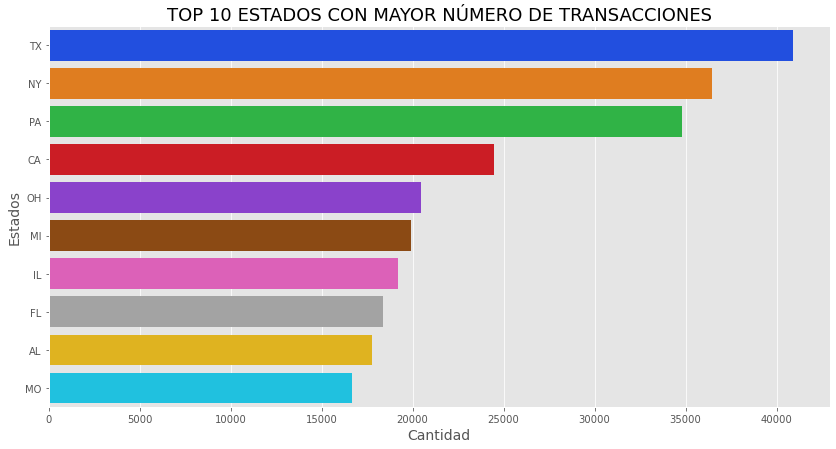

Estado
TX    40872
NY    36473
PA    34784
CA    24461
OH    20468
MI    19909
IL    19208
FL    18385
AL    17747
MO    16692
Name: Estado, dtype: int64


In [67]:
#Relación cantidad de transacciones y Estado
plt.figure(figsize=(14,7))
ax = sb.barplot(x = estados.values, y = estados.index, palette="bright")
ax.set_ylabel("Estados", fontsize=14)
ax.set_xlabel("Cantidad", fontsize=14)
ax.set_title("TOP 10 ESTADOS CON MAYOR NÚMERO DE TRANSACCIONES", fontsize=18)
plt.show()
print(estados)

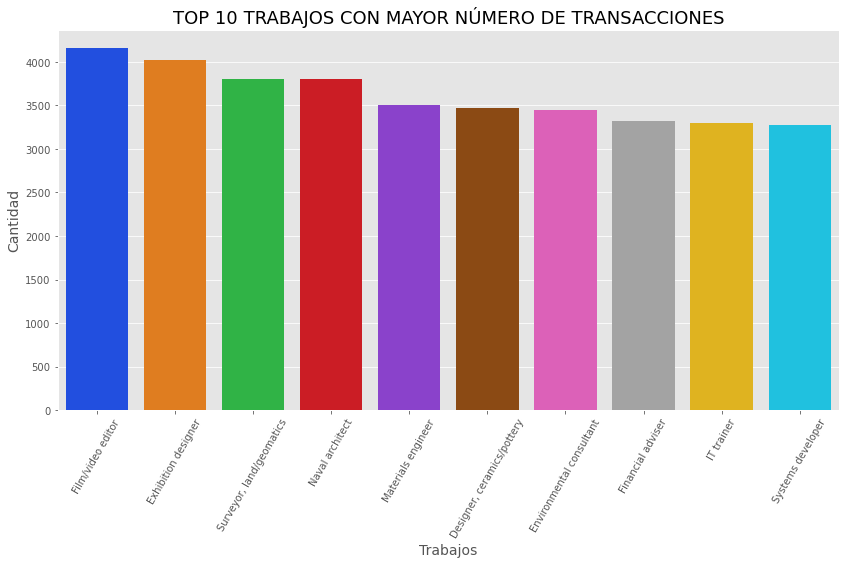

Trabajo
Film/video editor             4163
Exhibition designer           4019
Surveyor, land/geomatics      3806
Naval architect               3803
Materials engineer            3503
Designer, ceramics/pottery    3475
Environmental consultant      3449
Financial adviser             3327
IT trainer                    3293
Systems developer             3275
Name: Trabajo, dtype: int64


In [68]:
#Relación cantidad de transacciones y trabajos
trabajos = data.groupby('Trabajo')['Trabajo'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(14,7))
ax = sb.barplot(y = trabajos.values, x = trabajos.index, palette="bright")
ax.set_ylabel("Cantidad", fontsize=14)
ax.set_xlabel("Trabajos", fontsize=14)
ax.set_xticklabels(trabajos.index, rotation = 60) 
ax.set_title("TOP 10 TRABAJOS CON MAYOR NÚMERO DE TRANSACCIONES", fontsize=18)
plt.show()
print(trabajos)

### *2.10. MATRIZ DE CORRELACIÓN Y COVARIANZA*

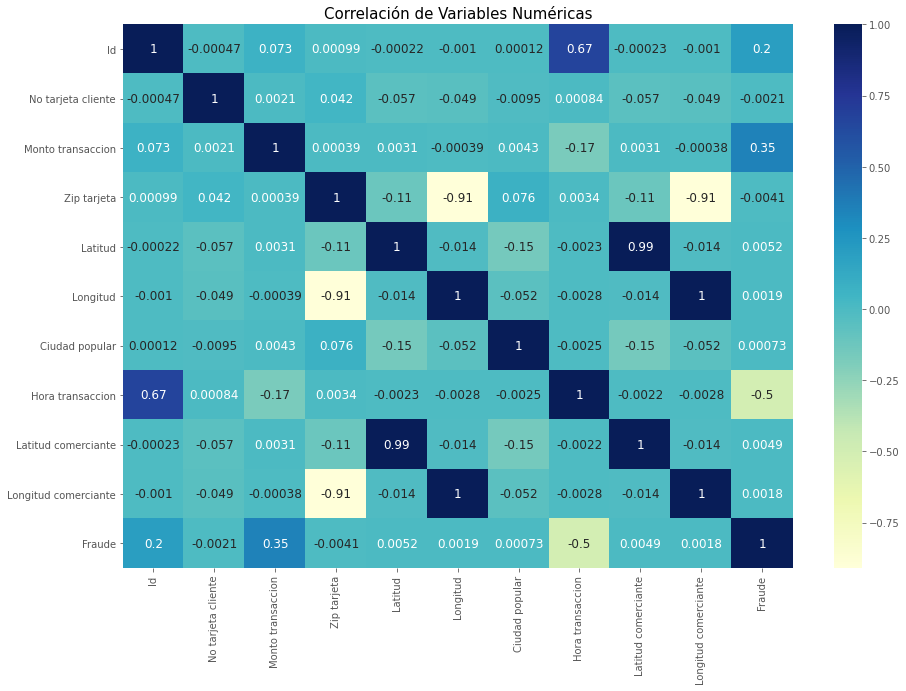

In [69]:
data['Fraude'] = data['Fraude'].astype('int64')
plt.figure(figsize=(15,10))
pc = data.corr(method ='pearson')
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 12}, cmap="YlGnBu")
ax.set_title('Correlación de Variables Numéricas', fontsize = 15)
plt.show()
del(pc)

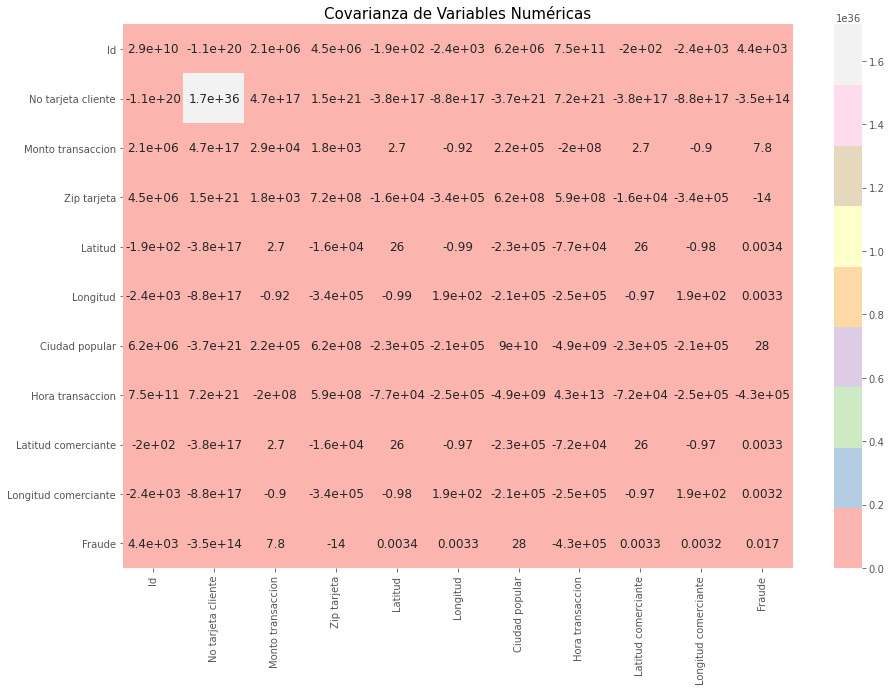

In [37]:
#Matriz de Covarianza
plt.figure(figsize=(15,10))
ax = sb.heatmap(data.cov(), annot=True, annot_kws={'size': 12}, cmap="Pastel1")
ax.set_title('Covarianza de Variables Numéricas', fontsize = 15)
plt.show()

### 2.11. *Hipótesis*


In [ ]:
def prueba(p):
    if (p < 0.05):
        return ("Si existen diferencias significativas")
    return("No se econtrarón diferencias significativas")

### Primera Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto de la transaccion de los hombres y de las mujeres
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5


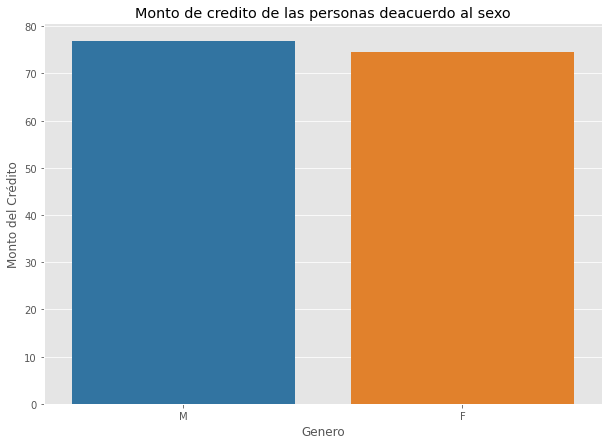

In [88]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Genero', y = 'Monto transaccion', data = data, ci = None, palette="tab10")
plt.title("Monto de credito de las personas deacuerdo al sexo")
plt.ylabel("Monto del Crédito")
plt.xlabel("Genero")
plt.show()

In [50]:
hombre = data.loc[data['Genero'] == 'M']
mujer =  data.loc[data['Genero'] == 'F']
hombreMonto = hombre['Monto transaccion']
mujerMonto = mujer['Monto transaccion']
stat, p = ttest_ind(hombreMonto, mujerMonto, equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=4.917, p=0.000001


In [53]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es rechazada  y es aceptada la hipotesis nula, osea que no hay diferencias

### Segunda Hipótesis
- Hipotesis Alternativa: si existen diferencias significativas en el monto de transacciones segun la clase 
- Hipotesis Nula : No, son iguales
- Alpha: 5% = 0.5

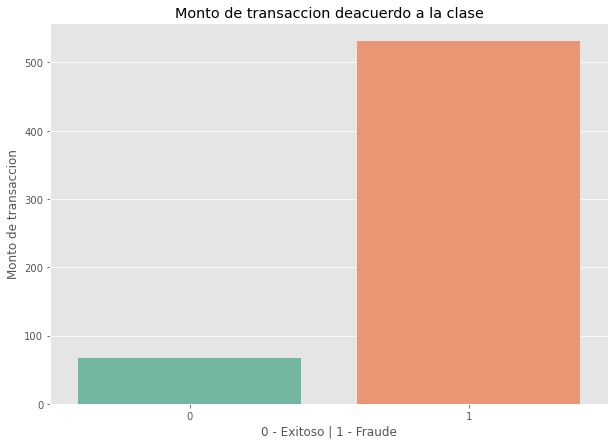

In [87]:
plt.figure(figsize=(10,7))
sb.barplot(x = 'Fraude', y = 'Monto transaccion', data = data, ci = None, palette="Set2")
plt.title("Monto de transaccion deacuerdo a la clase")
plt.ylabel("Monto de transaccion")
plt.xlabel("0 - Exitoso | 1 - Fraude")
plt.show()

In [32]:
NoFraude = data.loc[data['Fraude'] == 0]
SiFraude =  data.loc[data['Fraude'] == 1]
NoFraudeMonto = NoFraude['Monto transaccion']
SiFraudeMonto = SiFraude['Monto transaccion']

In [33]:
stat, p = ttest_ind(SiFraudeMonto, NoFraudeMonto , equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=54.316, p=0.000000


In [34]:
prueba(p)

'Si existen diferencias significativas'

### Dado el resultado podemos decir que la hipótesis alternativa es aceptada por lo tanto si existen diferencias significativas

In [49]:
stat, p = ttest_ind(new_Data['Genero'], new_Data['Monto transaccion'] , equal_var = False)
print('t=%.3f, p=%.6f' % (stat, p))

t=-111.535, p=0.000000


## 3. Procesamiento de los Datos

### Se realizarán tareas como:
- Selección de los datos
- Limpieza de los datos
- Construcción de los datos
- Integración de los datos

### *5.1 Selección de los datos*

In [72]:
data.head(5)

,Id,Fecha de Transaccion,No tarjeta cliente,Nombre comerciante,Categoria comerciante,Monto transaccion,Nombre,Apellido,Genero,Direccion tarjeta,...,Latitud,Longitud,Ciudad popular,Trabajo,Fecha de nacimiento,Fecha unica,Hora transaccion,Latitud comerciante,Longitud comerciante,Fraude
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [73]:
#Eliminación de atributos que no son relevantes
data2 = data.drop(columns=['Id', 'Fecha unica', 'Nombre', 'Apellido', 'Nombre comerciante', 'Direccion tarjeta',
                           'Latitud comerciante', 'Longitud comerciante', 'Estado', 'Trabajo', 'Zip tarjeta',
                           'Ciudad', 'Ciudad popular', 'Latitud', 'Longitud'])

Se toma la decisión de eliminar los atributos de la sentencia anterior por las siguientes reazones:
- algunos son iguales a los otros ejemplo Latitdu y Longitud con latitud y longitud del comerciante
- Algunos no aportan nada al modelo predictivo ejemplo: Nombre, Apellido, ID, pues son atributos para identificar el registro

In [74]:
data2.head(3)

,Fecha de Transaccion,No tarjeta cliente,Categoria comerciante,Monto transaccion,Genero,Fecha de nacimiento,Hora transaccion,Fraude
0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,1968-03-19,1371816865,0
1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,1990-01-17,1371816873,0
2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,1970-10-21,1371816893,0


In [75]:
#Verificando instancias duplicadas para eliminarlos ---> False indica que no existen duplicados
data2.duplicated().value_counts()

False    563225
dtype: int64

In [76]:
#Procesando fechas para obtener la edad de la persona
fecha_Tra = data2['Fecha de Transaccion'].apply(lambda x: x[0:10])
fecha_Tra = pd.to_datetime(fecha_Tra)
fecha_Nac = pd.to_datetime(data2['Fecha de nacimiento'])
edad = ((fecha_Tra - fecha_Nac)/365).apply(lambda x : str(x).split()[0]).astype('int8')
edad.head(5)

0    52
1    30
2    49
3    32
4    65
dtype: int8

In [77]:
#Procesando fecha de transacción para dividir el atributo compuesto
anio = fecha_Tra.apply(lambda x : x.year)
mes = fecha_Tra.apply(lambda x : x.month)
dia = fecha_Tra.apply(lambda x : x.day)

In [78]:
#Se debe ejecutar una sola vez
data2 = data2.drop(columns = ['Fecha de nacimiento', 'Fecha de Transaccion'])
data2 = data2.assign(anio = anio, mes = mes, dia = dia, edad = edad)

In [79]:
data2.head()

,No tarjeta cliente,Categoria comerciante,Monto transaccion,Genero,Hora transaccion,Fraude,anio,mes,dia,edad
0,2291163933867244,personal_care,2.86,M,1371816865,0,2020,6,21,52
1,3573030041201292,personal_care,29.84,F,1371816873,0,2020,6,21,30
2,3598215285024754,health_fitness,41.28,F,1371816893,0,2020,6,21,49
3,3591919803438423,misc_pos,60.05,M,1371816915,0,2020,6,21,32
4,3526826139003047,travel,3.19,M,1371816917,0,2020,6,21,65


In [157]:
data2['Categoria comerciante'].value_counts()

gas_transport     56988
grocery_pos       54296
home              52543
shopping_pos      50634
kids_pets         48931
shopping_net      43492
entertainment     40337
personal_care     39547
food_dining       39419
health_fitness    36807
misc_pos          34824
misc_net          28282
grocery_net       19560
travel            17565
Name: Categoria comerciante, dtype: int64

In [81]:
#Codificando las Variables categoricas ---> cat.codes: Codifica por orden alfabetico
data2 = pd.get_dummies(data2, columns = ['Categoria comerciante'], prefix = 'C')
data2['Genero'] = data2['Genero'].astype('category').cat.codes
data2['anio'] = data2['anio'].astype('category').cat.codes
data2.head(3)

In [92]:
data2.head(5)

,No tarjeta cliente,Monto transaccion,Genero,Hora transaccion,Fraude,anio,mes,dia,edad,C_entertainment,...,C_grocery_pos,C_health_fitness,C_home,C_kids_pets,C_misc_net,C_misc_pos,C_personal_care,C_shopping_net,C_shopping_pos,C_travel
0,2291163933867244,2.86,1,1371816865,0,1,6,21,52,0,...,0,0,0,0,0,0,1,0,0,0
1,3573030041201292,29.84,0,1371816873,0,1,6,21,30,0,...,0,0,0,0,0,0,1,0,0,0
2,3598215285024754,41.28,0,1371816893,0,1,6,21,49,0,...,0,1,0,0,0,0,0,0,0,0
3,3591919803438423,60.05,1,1371816915,0,1,6,21,32,0,...,0,0,0,0,0,1,0,0,0,0
4,3526826139003047,3.19,1,1371816917,0,1,6,21,65,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
#Escalando Datos
from sklearn.preprocessing import StandardScaler, RobustScaler

#std_Escaler = StandardScaler()
rob_Escaler = RobustScaler() 

In [101]:
data2['Monto transaccion'] = rob_Escaler.fit_transform(data2['Monto transaccion'].values.reshape(-1, 1))
data2['Hora transaccion'] = rob_Escaler.fit_transform(data2['Hora transaccion'].values.reshape(-1, 1))
data2['No tarjeta cliente'] = rob_Escaler.fit_transform(data2['No tarjeta cliente'].values.reshape(-1, 1))
data2['edad'] = rob_Escaler.fit_transform(data2['edad'].values.reshape(-1, 1))
data2.head(5)

,No tarjeta cliente,Monto transaccion,Genero,Hora transaccion,Fraude,anio,mes,dia,edad,C_entertainment,...,C_grocery_pos,C_health_fitness,C_home,C_kids_pets,C_misc_net,C_misc_pos,C_personal_care,C_shopping_net,C_shopping_pos,C_travel
0,-0.28,-0.60,1,-0.88,0,1,6,21,52,0,...,0,0,0,0,0,0,1,0,0,0
1,0.01,-0.24,0,-0.88,0,1,6,21,30,0,...,0,0,0,0,0,0,1,0,0,0
2,0.02,-0.09,0,-0.88,0,1,6,21,49,0,...,0,1,0,0,0,0,0,0,0,0
3,0.02,0.16,1,-0.88,0,1,6,21,32,0,...,0,0,0,0,0,1,0,0,0,0
4,0.00,-0.60,1,-0.88,0,1,6,21,65,0,...,0,0,0,0,0,0,0,0,0,1


In [102]:
#Verificando el tipo de atributo del dataset Procesado
data2.dtypes

No tarjeta cliente    float64
Monto transaccion     float64
Genero                   int8
Hora transaccion      float64
Fraude                  int64
anio                     int8
mes                     int64
dia                     int64
edad                     int8
C_entertainment         uint8
C_food_dining           uint8
C_gas_transport         uint8
C_grocery_net           uint8
C_grocery_pos           uint8
C_health_fitness        uint8
C_home                  uint8
C_kids_pets             uint8
C_misc_net              uint8
C_misc_pos              uint8
C_personal_care         uint8
C_shopping_net          uint8
C_shopping_pos          uint8
C_travel                uint8
dtype: object

In [103]:
#Cantidad de datos clasificados por fraudes
cantidad = data2['Fraude'].value_counts()
print('Cantidad total de datos: ', cantidad.sum())
print('Cantidad Fraudulentas: ', cantidad[1])
print('Cantidad Exitosas: ', cantidad[0])

Cantidad total de datos:  563225
Cantidad Fraudulentas:  9651
Cantidad Exitosas:  553574


In [104]:
from sklearn.model_selection import train_test_split

#División de Datos Originales
train_Original, test_Original = train_test_split(data2, test_size = 0.2, random_state = 42)

### *5.2 Balance de la población a través de una submuestra aleatoria*

### ¿Por qué creamos una submuestra?
En la distribución de la clase vimos que el conjunto de datos estaba muy desequilibrado, el cual puede provocar los siguientes problemas:
- Sobreajuste: Los modelos de clasificación supondrán que en la mayoría de los casos no hay fraudes y no detectaran las transacciones fraudulentas, lo cual es el objetivo principal.
- Correlaciones incorrectas: Al existir el desbalance no se podran ver con claridad las correlaciones verdaderas entre la clase y las características.

In [105]:
#Obtener muestra aleatoria de los datos
data2 = data2.sample(frac = 1)

#Separamos las cantidades por la Clase y escogemos la submuestra de la clase mayoritaria
data_Fra = data2.loc[data2['Fraude'] == 1]
data_Exi = data2.loc[data2['Fraude'] == 0][:cantidad[1]]

#Uniendo los datos
new_Data = pd.concat([data_Fra, data_Exi]).sample(frac = 1, random_state = 1)
new_Data.head()

,No tarjeta cliente,Monto transaccion,Genero,Hora transaccion,Fraude,anio,mes,dia,edad,C_entertainment,...,C_grocery_pos,C_health_fitness,C_home,C_kids_pets,C_misc_net,C_misc_pos,C_personal_care,C_shopping_net,C_shopping_pos,C_travel
61644,-0.79,-0.57,1,-0.69,0,1,7,12,33,0,...,0,0,0,0,0,0,0,0,0,1
474978,1111.78,-0.04,1,0.64,0,1,12,14,40,0,...,0,0,0,0,0,0,0,0,0,0
242415,-0.71,11.56,0,-0.12,1,1,9,17,33,0,...,0,0,0,0,1,0,0,0,0,0
557568,0.56,12.92,0,-4.49,1,0,4,28,19,0,...,0,0,0,0,0,0,0,1,0,0
559685,0.20,3.73,0,-3.04,1,0,10,13,76,0,...,1,0,0,0,0,0,0,0,0,0


In [106]:
#Tamaño de la submuestra aleatoria ---> Debe dar 19.302
new_Data.shape

(19302, 23)

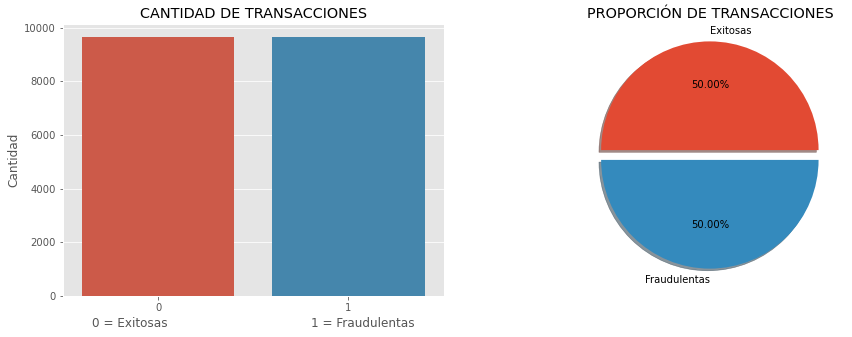

In [109]:
datos = new_Data['Fraude'].value_counts()
labels = np.array(['Exitosas', 'Fraudulentas'])
#figura y gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
circular = ax2.pie(datos.values, labels=labels, autopct='%1.2f%%', shadow=True, explode = [0.09, 0])
#barras = ax1.bar(labels, datos.values)
barras = sb.countplot(x = 'Fraude', data = new_Data, ax = ax1)
#Titulos
ax2.set(title="PROPORCIÓN DE TRANSACCIONES")
ax1.set(title="CANTIDAD DE TRANSACCIONES")
ax1.set(ylabel = 'Cantidad')
ax1.set(xlabel = f'0 = Exitosas {" "*35} 1 = Fraudulentas')
plt.show()

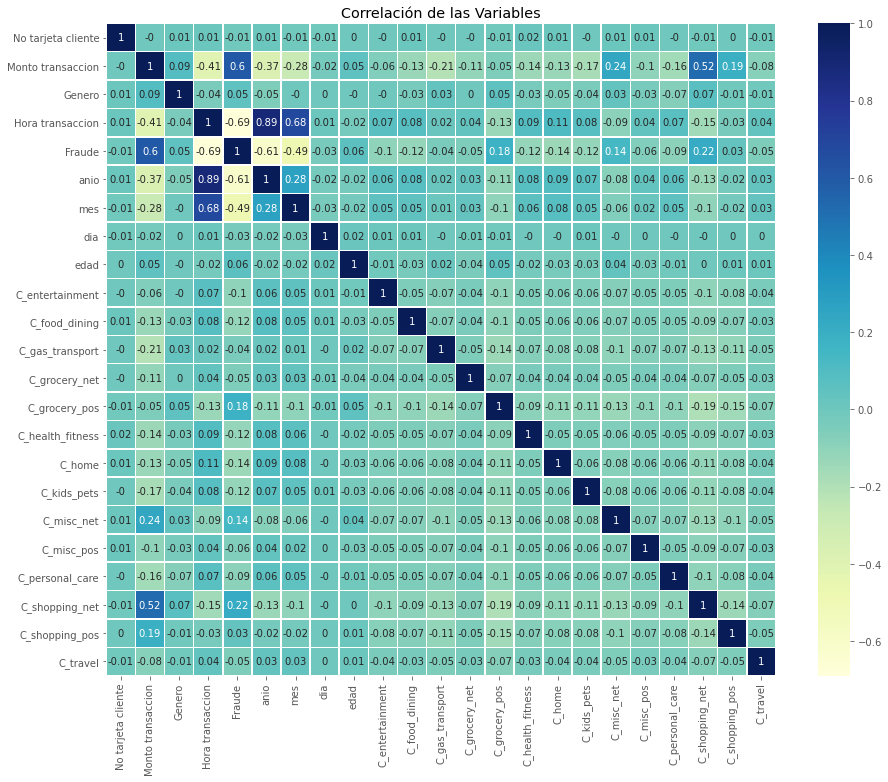

In [111]:
plt.figure(figsize=(15,12))
pc = new_Data.corr(method ='pearson').round(2)
ax = sb.heatmap(pc, annot=True, annot_kws={'size': 10}, linewidths=0.5, cmap='YlGnBu')
plt.title('Correlación de las Variables')
plt.show()

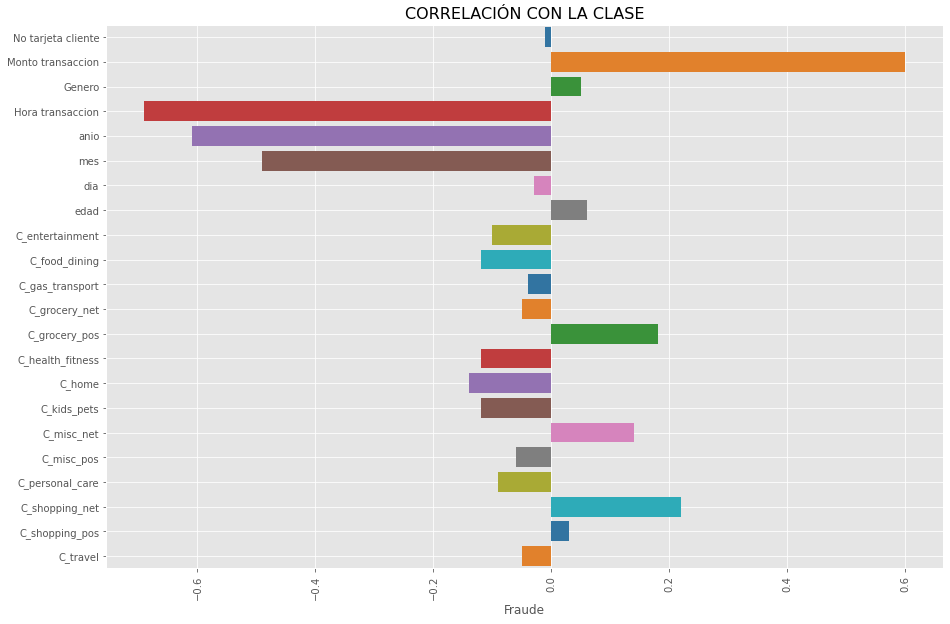

In [116]:
plt.figure(figsize = (15, 10))
valores = pc.Fraude.drop('Fraude')
ax = sb.barplot(y = valores.index, x = valores.values, palette = 'tab10', orient = 'h')
ax.set_xlabel('Fraude')
plt.title("CORRELACIÓN CON LA CLASE", fontsize = 16), plt.xticks(rotation = 90), plt.grid(True)
plt.show() 

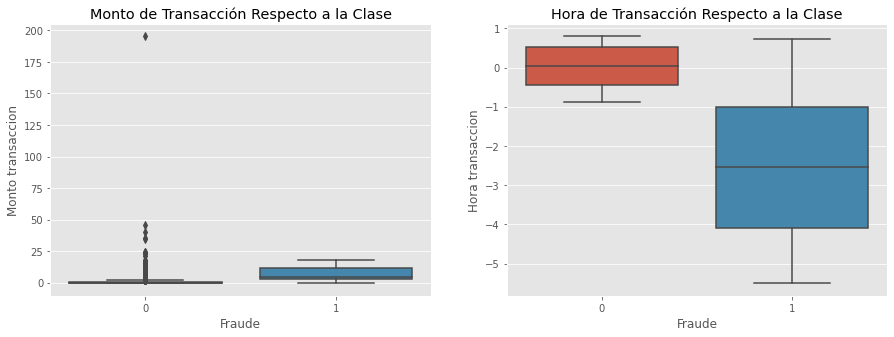

In [117]:
#Outliers monto de transacción respecto al atriuto clase
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
ax1 = sb.boxplot(x = "Monto transaccion", x = 'Fraude', data = new_Data, ax = ax1)
ax2 = sb.boxplot(y = "Hora transaccion", x = 'Fraude', data = new_Data, ax = ax2)
#Etiquetas
ax1.set_title('Monto de Transacción Respecto a la Clase')
ax2.set_title('Hora de Transacción Respecto a la Clase')
plt.show()

In [119]:
#Tratando los datos atípicos del atributo monto de transacción cuando el registro es fraudulento
reg_Exit = new_Data[new_Data.Fraude == 0]
reg_Fra = new_Data[new_Data.Fraude == 1]
Q1 = reg_Exit['Monto transaccion'].quantile(.25)
Q3 = reg_Exit['Monto transaccion'].quantile(.75)
IQR = Q3 - Q1
mediana = reg_Exit['Monto transaccion'].median()
v_Min = reg_Exit['Monto transaccion'].min()
v_Max = reg_Exit['Monto transaccion'].max()
big_Inf = (Q1 - 1.5 * IQR)
big_Sup = (Q3 + 1.5 * IQR)

In [120]:
print("Valores del Gráfico de Caja y Bigotes del Monto de Transacción Exitosas")
print("Mediana: ", mediana)
print("Primer Cuartil: ", Q1)
print("Tercer Cuartil: ", Q3)
print("Rango Intercuartil:, ", IQR)
print("Valor Minimo: ", v_Min)
print("Valor Máximo: ", v_Max)
print ("Bigote Superior: ", big_Sup)
print ("Bigote Inferior: ", big_Inf)

Valores del Gráfico de Caja y Bigotes del Monto de Transacción Exitosas
Mediana:  0.0038816758131441464
Primer Cuartil:  -0.5067594699504752
Tercer Cuartil:  0.478918484807924
Rango Intercuartil:,  0.9856779547583991
Valor Minimo:  -0.6269575692678357
Valor Máximo:  195.28777941373312
Bigote Superior:  1.9574354169455226
Bigote Inferior:  -1.9852764020880738


In [121]:
ubicacion = reg_Exit['Monto transaccion'] > big_Sup
ubicacion.value_counts()

False    9209
True      442
Name: Monto transaccion, dtype: int64

In [123]:
datos_sin_out = pd.concat([reg_Exit[reg_Exit['Monto transaccion'] <= big_Sup], reg_Fra], ignore_index=True)

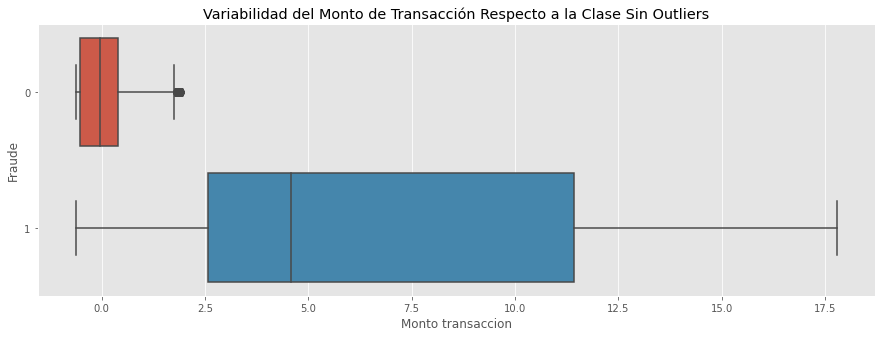

In [125]:
plt.figure(figsize=(15, 5))
ax = sb.boxplot(x = "Monto transaccion", y = 'Fraude', data = datos_sin_out, orient = 'h')
ax.set_title('Variabilidad del Monto de Transacción Respecto a la Clase Sin Outliers')
plt.show()

In [136]:
#Dividiendo los datos
from sklearn.model_selection import train_test_split

train, test = train_test_split(datos_sin_out, test_size=0.2, random_state=42)